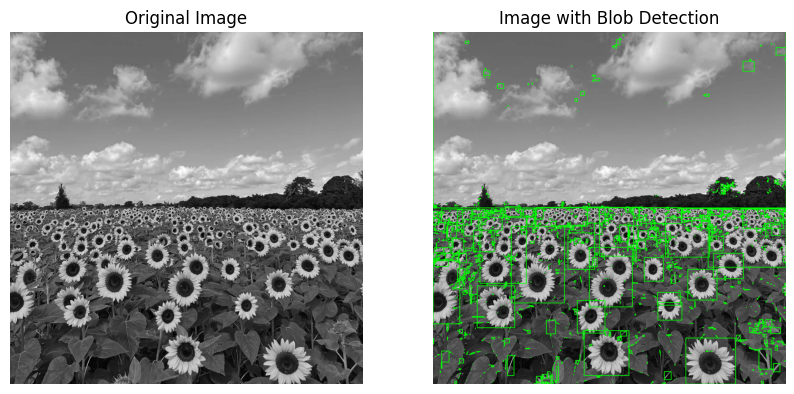

In [3]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (grayscale)
image = cv2.imread('D:/MySem5/ImagePro/Image-Processing-and-Machine-Vision-Tasks/the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load the image.")
else:
    # Apply thresholding to create a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Find connected components (blobs) in the binary image
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Create a copy of the original image to draw on
    image_with_blobs = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Iterate through the detected blobs
    for label in range(1, num_labels):  # Skip background label (label 0)
        # Get blob properties
        left, top, width, height, area = stats[label]

        # Draw bounding box around the blob on the image copy
        cv2.rectangle(image_with_blobs, (left, top), (left + width, top + height), (0, 255, 0), 2)

    # Display both the original image and the image with blob detection
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(image_with_blobs, cv2.COLOR_BGR2RGB))
    plt.title('Image with Blob Detection'), plt.axis('off')
    plt.show()



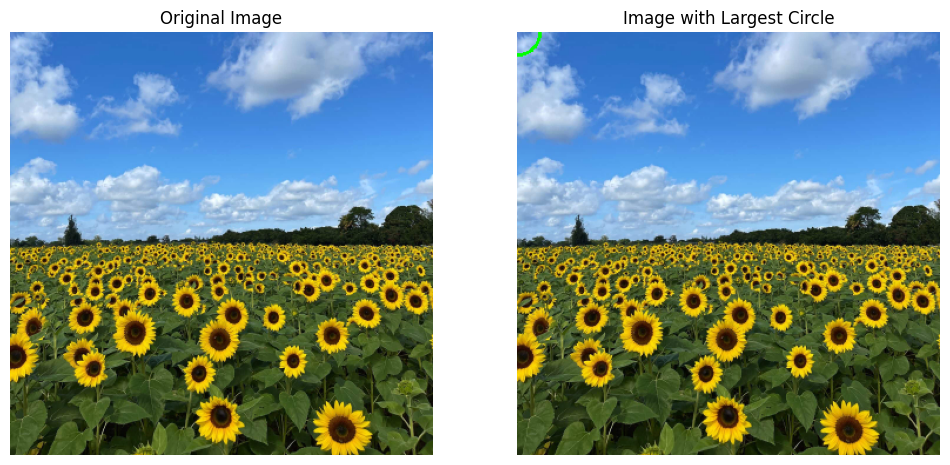

Parameters of the largest circle:
Center (x, y): 0 0
Radius: 19
Sigma (σ) used: 9.5


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('D:/MySem5/ImagePro/Image-Processing-and-Machine-Vision-Tasks/the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the range of σ (sigma) values for scale-space
sigma_values = np.arange(1, 10, 0.5)  # You can adjust the range and step size

# Initialize a list to store detected circles
detected_circles = []

# Perform scale-space extrema detection
for sigma in sigma_values:
    # Apply the LoG filter to the grayscale image
    blurred = cv2.GaussianBlur(gray, (0, 0), sigmaX=sigma)
    log_image = cv2.Laplacian(blurred, cv2.CV_64F)
    
    # Find local extrema in the LoG image
    extrema = cv2.dilate(log_image, None)
    extrema = (extrema == log_image).astype(np.uint8)
    
    # Find circle centers from extrema
    centers = np.column_stack(np.where(extrema))
    
    # Append detected centers with current σ value to the list
    detected_circles.extend([(x, y, sigma) for x, y in centers])

# Filter and select the largest circles based on some criteria (e.g., radius)
# You may use techniques like non-maximum suppression to select the most prominent circles.

# Sort circles by radius (largest first)
detected_circles.sort(key=lambda x: x[2], reverse=True)

# Get parameters of the largest circle
largest_circle = detected_circles[0]
x, y, largest_sigma = largest_circle
radius = int(2 * largest_sigma)  # Adjust this factor as needed

# Create a copy of the original image to draw on
image_with_circle = image.copy()

# Draw the largest circle on the copy of the image
cv2.circle(image_with_circle, (x, y), radius, (0, 255, 0), 2)

# Display the original image and the image with the largest circle overlaid on the same graph
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(image_with_circle, cv2.COLOR_BGR2RGB))
plt.title('Image with Largest Circle')
plt.axis('off')

plt.show()

# Report parameters of the largest circle
print("Parameters of the largest circle:")
print("Center (x, y):", x, y)
print("Radius:", radius)
print("Sigma (σ) used:", largest_sigma)


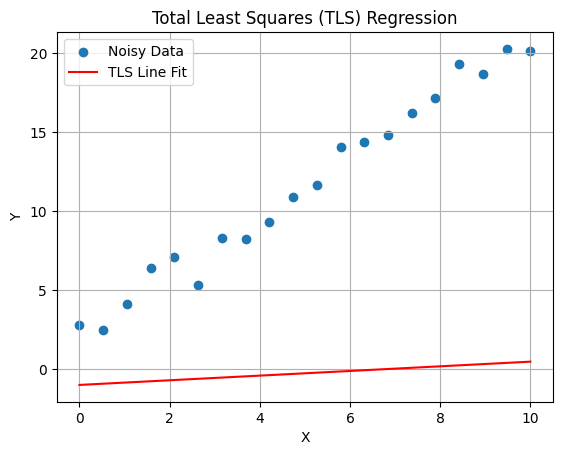

TLS Line Equation: y = 0.15x + -1.01


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some noisy data points
np.random.seed(0)
x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.normal(0, 1, len(x))

# Create a matrix A for TLS
A = np.vstack((x, np.ones(len(x)))).T

# Perform SVD on A
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Extract the singular vector corresponding to the smallest singular value
V = VT.T
v_min = V[:, -1]

# Calculate the TLS coefficients
a_tls, b_tls = -v_min[0] / v_min[1], 1 / v_min[1]

# Fit the TLS line
y_tls = a_tls * x + b_tls

# Plot the original data and TLS line
plt.scatter(x, y, label='Noisy Data')
plt.plot(x, y_tls, color='red', label='TLS Line Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Total Least Squares (TLS) Regression')
plt.grid(True)
plt.show()

print(f"TLS Line Equation: y = {a_tls:.2f}x + {b_tls:.2f}")


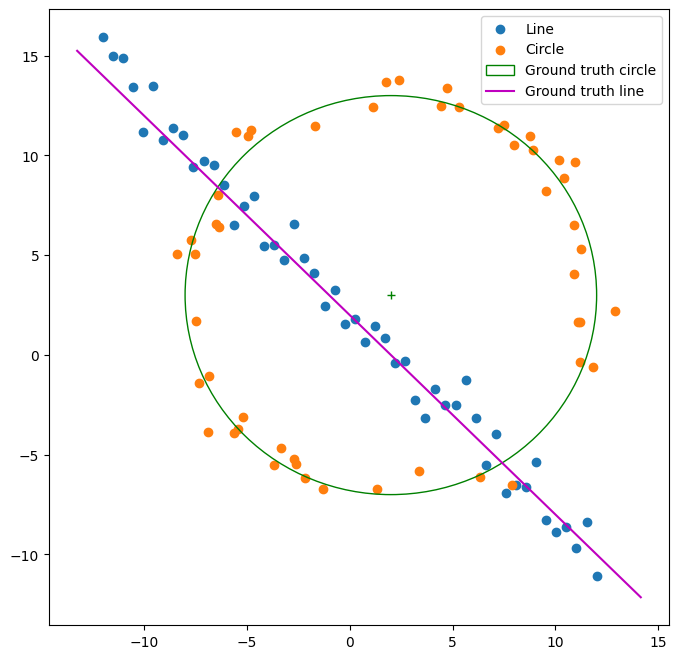

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed (optional)
# np.random.seed(0)

# Parameters
N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16

# Generate circle data
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x = x0_gt + (r + n) * np.cos(t)
y = y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Generate line data
s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine circle and line points
X = np.vstack((X_circ, X_line))

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Scatter plot for line and circle
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

# Ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)

# Ground truth line
ax.plot(x0_gt, y0_gt, '+', color='g')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

# Display legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import tikzplotlib
import matplotlib.pyplot as plt

# Set random seed (optional)
# np.random.seed(0)

N = 100
half_n = N // 2

r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

plt.legend()
plt.show()


Samples [51 58]
[6.1 6.8] [16.2518969  17.21945512]
m, b: 1.3822260337642889 7.820318089573867
[1.17456068e+02 8.11641982e+01 1.99163824e+02 1.25653234e+02
 1.85418371e+02 5.49804981e+01 2.58727382e+01 6.11568632e+01
 9.69675282e+01 1.41368469e+02 4.55925446e+02 9.81359221e+01
 2.91567149e+01 7.24420461e+01 6.37601569e+01 1.63128081e+02
 7.41225307e+00 1.16739765e+02 1.28428228e+02 1.38598061e+02
 5.90908860e+01 9.11224644e+01 1.35195218e+01 7.04319206e+01
 6.73456935e+01 1.70636148e+02 2.77032975e+01 2.25362314e+02
 3.47460109e+02 7.73892205e-01 1.80169080e+02 2.17200731e+02
 6.76964233e+01 9.00674468e+01 1.18246500e+02 1.02239329e+02
 1.02353962e+02 1.11812439e+01 3.07907420e+02 2.97407390e+02
 6.15027143e+01 2.15188707e+01 2.14273008e+02 8.49269196e+01
 1.65535585e+02 1.12814835e+02 2.47670356e+02 2.50126100e+02
 7.70079997e+01 3.07843510e+01 2.12730336e+01 2.44629500e+02
 4.49733919e+01 1.03596006e+02 9.58930813e+01 1.58080641e+02
 1.03441176e+01 1.93301658e+02 2.44629500e+02 1.829

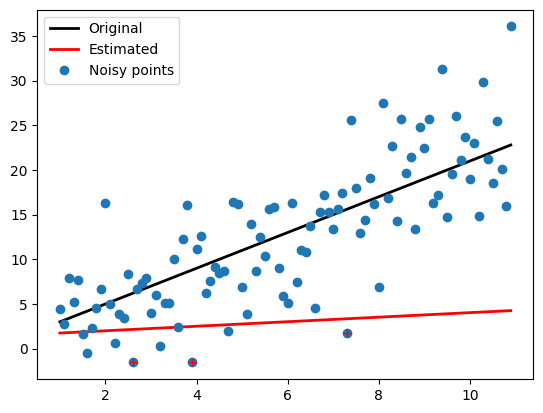

In [18]:
# RANSAC

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

m = 2
c = 1
xo = np.arange(1,11, 0.1) # Un-corrupted x
mu, sigma = 0, 5 # mean and standard deviation
#x = xo + np.random.normal(mu, sigma, len(xo)) # noisy x
x = xo
n = np.random.normal(mu, sigma, len(xo))
o = np.zeros(x.shape)
o[-1] = 20 # Outliers
y = m*x + c + n + o

def line(x,y):
    m = (y[1] - y[0])/(x[1] - x[0])
    b = y[0] - m*x[0]
    print("m, b:", m, b)
    return m, -1, b

def distance(parameters, x, y):
    a = parameters[0]
    b = parameters[1]
    d = parameters[2]
    return (a*x + b*y - d)**2


thresh = 10
s = 2
loop = True 
consensus = []
while loop:
    samples = np.random.choice(len(x), 2, replace=False)
    print("Samples", samples)
    xs = x[samples]
    ys = y[samples]
    print(xs,ys)
    parameters = line(xs,ys)
    print(distance(parameters, x, y) )
    consensus =  distance(parameters, x, y) < thresh
    print('Consensus: ', consensus)
    print("Lenght:", sum(consensus))
    if sum(consensus) >= 2:
        loop = False
    

xc = x[consensus]
yc = y[consensus]
print("xc:", xc)
print("yc", yc)
X = np.concatenate([xc.reshape(len(xc),1), np.ones((len(xc), 1))], axis=1)
print(X.transpose()@X)
B = np.linalg.pinv(X.T@X)@X.T@yc
print(B)
mstar = B[0]
cstar = B[1]

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1]+c], color='k', linestyle='-', linewidth=2, label=r'Original')
plt.plot([x[0], x[-1]], [mstar*x[0] + c, mstar*x[-1]+cstar], 
         color='r', linestyle='-', linewidth=2, label=r'Estimated')
plt.plot(x,y, 'o', label='Noisy points')
plt.plot(xc, yc, '+', color='r')
plt.legend(loc='best')

In [25]:
import numpy as np
from scipy import linalg

def fit_line(points):
    # Fit a line to a set of points using total least squares
    # Input: points - an array of shape (N, 2) where N is the number of points
    # Output: params - a vector of shape (3,) containing the line parameters [a, b, d]

    # Compute the mean of the points
    mean = np.mean(points, axis=0)

    # Center the points by subtracting the mean
    centered = points - mean

    # Compute the SVD of the centered matrix
    U, S, Vt = linalg.svd(centered)

    # The right singular vector corresponding to the smallest singular value is the normal vector of the best fitting line
    normal = Vt[-1, :]

    # The distance from the mean to the line is given by the dot product of the normal and mean vectors
    distance = np.dot(normal, mean)

    # The line parameters are given by appending the distance to the normal vector
    params = np.append(normal, distance)

    # Normalize the parameters so that ||[a, b]^T|| = 1
    norm = linalg.norm(params[:2])
    params = params / norm

    return params

def compute_distances(points, params):
    # Compute the normal distance from each point to a line
    # Input: points - an array of shape (N, 2) where N is the number of points
    #        params - a vector of shape (3,) containing the line parameters [a, b, d]
    # Output: distances - an array of shape (N,) containing the distances

    # Extract the line parameters
    a, b, d = params

    # Compute the distance from each point to the line using |a x + b y + d|
    distances = np.abs(a * points[:, 0] + b * points[:, 1] + d)

    return distances

def ransac_line(points, n_iter=1000, sample_size=2, inlier_thresh=0.1, min_inliers=10):
    # Estimate a line from a set of points using RANSAC
    # Input: points - an array of shape (N, 2) where N is the number of points
    #        n_iter - an integer specifying the number of iterations
    #        sample_size - an integer specifying the size of random sample
    #        inlier_thresh - a float specifying the maximum distance for a point to be an inlier
    #        min_inliers - an integer specifying the minimum number of inliers for a valid model
    # Output: best_params - a vector of shape (3,) containing the best line parameters [a, b, d]
    #         best_inliers - an array of shape (M,) containing the indices of inliers for best_params where M is the number of inliers

    # Initialize some variables
    N = len(points) # The total number of points
    best_params = None # The best line parameters
    best_inliers = None # The indices of inliers for the best line
    best_count = 0 # The number of inliers for the best line

    # Loop over the iterations
    for i in range(n_iter):

        # Randomly select a sample of points
        sample = np.random.choice(N, sample_size, replace=False)

        # Fit a line to the sample
        params = fit_line(points[sample])

        # Compute the distances from all points to the line
        distances = compute_distances(points, params)

        # Find the indices of inliers
        inliers = np.where(distances < inlier_thresh)[0]

        # Count the number of inliers
        count = len(inliers)

        # Update the best estimate if the current one has more inliers and meets the minimum requirement
        if count > best_count and count >= min_inliers:
            best_params = params
            best_inliers = inliers
            best_count = count

    return best_params, best_inliers
print(ransac_line)

<function ransac_line at 0x000001608796AC00>


In [17]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the RANSAC estimator for the line
ransac = RANSACRegressor(LinearRegression(), min_samples=2, residual_threshold=1.0, random_state=0)

# Fit the RANSAC model to the data
X_line = np.array(X_line)  # Assuming X_line is a list of points
X_line = X_line.reshape(-1, 2)  # Reshape the data for fitting
ransac.fit(X_line)

# Get the inliers and estimated line parameters
inliers = X_line[ransac.inlier_mask_]
a, b = ransac.estimator_.coef_
d = ransac.estimator_.intercept_

# Plot the line and inliers
plt.scatter(X_line[:, 0], X_line[:, 1], label='Line')
plt.plot(X_line[:, 0], a * X_line[:, 0] + b, color='m', label='RANSAC Line')
plt.scatter(inliers[:, 0], inliers[:, 1], color='g', label='Line Inliers')
plt.legend()


TypeError: RANSACRegressor.fit() missing 1 required positional argument: 'y'